# INTRODUCTION

In the intense world of critical care, every second matters, especially when dealing with the puzzling challenge of sepsis. Sepsis, a dangerous condition triggered by the body's strong reaction to an infection, poses a significant threat. It's hard to spot and moves quickly.

I'm delving into the realm of using Machine Learning (ML) to tackle sepsis. It's like using smart computer stuff to help doctors predict sepsis early. I'm sifting through heaps of patient info: their health records, how they're doing, and signs that might show sepsis is on its way.

# BUSINESS UNDERSTANDING

Inside the busy corridors of the ICU, spotting and predicting sepsis is a big deal. It's tough but crucial to use computers to find patterns in patient data that hint if sepsis might be around the corner.

I'm working to create computer programs (ML models) that can predict sepsis before it happens. These models could help doctors act fast and maybe save lives. It's not just about building programs; it's about helping doctors know more about sepsis and get ready for it.

# IMPORTATION

In [61]:
# Import Libraries
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Correlation
import phik

# Hypothesis Testing
import scipy.stats as stats
from scipy.stats import chi2_contingency

# Hyperparameter Tuning and Visualization
import optuna
import optuna.visualization as ov

# Model Exportation
import os
import joblib

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, RandomizedSearchCV
from sklearn.utils.class_weight import compute_class_weight

# Class Imbalance
from imblearn.over_sampling import SMOTE

# Modeling
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier

# Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Warnings
import warnings

warnings.filterwarnings('ignore')

# DATA READING

In [2]:
# Read the Train and the Test set
train = pd.read_csv('../data/raw/train.csv')
test = pd.read_csv('../data/raw/test.csv')

# DATA UNDERSTANDING

### DATA DICTIONARY

| Column   Name                | Attribute/Target | Description                                                                                                                                                                                                  |
|------------------------------|------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ID                           | N/A              | Unique number to represent patient ID                                                                                                                                                                        |
| PRG           | Attribute1       |  Plasma glucose|
| PL               | Attribute 2     |   Blood Work Result-1 (mu U/ml)                                                                                                                                                |
| PR              | Attribute 3      | Blood Pressure (mm Hg)|
| SK              | Attribute 4      | Blood Work Result-2 (mm)|
| TS             | Attribute 5      |     Blood Work Result-3 (mu U/ml)|                                                                                  
| M11     | Attribute 6    |  Body mass index (weight in kg/(height in m)^2|
| BD2             | Attribute 7     |   Blood Work Result-4 (mu U/ml)|
| Age              | Attribute 8      |    patients age  (years)|
| Insurance | N/A     | If a patient holds a valid insurance card|
| Sepssis                 | Target           | Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise |



In [3]:
# Get the first 5 rows of train set
train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [4]:
# Get the last 5 rows of the train set
train.tail()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative
598,ICU200608,1,173,74,0,0,36.8,0.088,38,1,Positive


In [5]:
# Get the first 5 rows of test set
test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [6]:
# Get the last 5 rows of the test set
test.tail()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
164,ICU200773,10,101,76,48,180,32.9,0.171,63,1
165,ICU200774,2,122,70,27,0,36.8,0.340,27,1
166,ICU200775,5,121,72,23,112,26.2,0.245,30,1
167,ICU200776,1,126,60,0,0,30.1,0.349,47,1
168,ICU200777,1,93,70,31,0,30.4,0.315,23,1


In [7]:
# Check for the number of rows and columns in the train dataset
train.shape

(599, 11)

In [8]:
# Check for the number of rows and columns in the test dataset
test.shape

(169, 10)

In [9]:
# Get more information on the train set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [10]:
# Get more information on the test set
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


In [11]:
# Check for duplicates for train
train.duplicated().sum()

0

In [12]:
# Check for duplicates for test
test.duplicated().sum()

0

In [13]:
# Summary statistics for train (Exclude Object Columns)
train.describe(exclude='object')

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The summary statistics provide a comprehensive view of various patient parameters within the dataset. 

Across patients, the average plasma glucose level hovers around 3.82, with a wide range spanning from 0 to 17 and the majority of values concentrated below 6 (75th percentile). Blood work results, averaging approximately 120.15, show a considerable spread from 0 to 198, with half of the values falling between 99 and 140. 

Similarly, blood pressure averages around 68.73, varying from 0 to 122, with 50% of values falling between 64 and 80. Other parameters, such as Blood Work Result-2, Blood Work Result-3, Body Mass Index (BMI), and Age, exhibit diverse ranges and averages, offering insights into the dataset's demographic makeup. 

The Insurance variable, represented in binary form (0 or 1), demonstrates a mean value of approximately 0.69, indicating a prevalence of insurance coverage within the patient cohort. 

These statistics collectively outline the distribution and characteristics of key health indicators, paving the way for further exploration into potential associations and predictive patterns, especially regarding sepsis within the ICU context.

In [14]:
# Summary statistics for train (Exclude Int and Float Columns)
train.describe(exclude=['int64', 'float64'])

,ID,Sepssis
count,599,599
unique,599,2
top,ICU200010,Negative
freq,1,391


In [15]:
# Distribution of the Target
train['Sepssis'].value_counts()

Sepssis
Negative    391
Positive    208
Name: count, dtype: int64

In the dataset, the count of patients categorized by their sepsis status reveals 391 cases labeled as 'Negative' and 208 cases labeled as 'Positive'. This distribution underscores the prevalence of 'Negative' instances over 'Positive' ones, indicating an imbalance in sepsis occurrences within the dataset. 

Addressing this imbalance is crucial to ensure the models are trained effectively and account for the rarity of 'Positive' cases in real-world scenarios.

# DATA ASSESSMENT

Following data gathering from various sources, a comprehensive assessment was conducted to evaluate quality issues both visually and programmatically.

### DATA QUALITY ISSUES

- The target column 'Sepssis' contains 'Positive' and 'Negative' instead of numerical values (0 and 1).

- Rename the 'Sepssis' column to 'sepsis' for consistency and clarity.


# HYPOTHESIS

Sepsis, a life-threatening condition, is a leading cause of mortality in intensive care units. While lack of insurance and age differences has been associated with higher in-hospital mortality due to sepsis, the reasons behind this disparity remain unclear. Insurance can facilitate timely access to care, potentially impacting sepsis outcomes and age is a factor that is likely to determine sepsis-related hospitalization.

With this, I investigate two hypothesis

#### HYPOTHESIS 1

**Null Hypothesis (H0):** Holding medical insurance has no significant association with the probability of developing sepsis in ICU patients.

**Alternative Hypothesis (H1):** Holding medical insurance is associated with a significant difference in the probability of developing sepsis in ICU patients.

#### HYPOTHESIS 2

**Null Hypothesis (H0):** There is no association between the occurrence of sepsis and the age of ICU patients.

**Alternative Hypothesis (H1):** There is a significant association between the occurrence of sepsis and the age of ICU patients.


# ANALYTICAL QUESTIONS


1. **Distribution of Patient Ages :** Explore the age distribution among patients.
   

2. **Variation of Plasma Glucose (PRG) with Sepsis :** Assess the differences in Plasma Glucose levels between patients with positive and negative sepsis.
  

3. **Relationship between Age and Body Mass Index (M11) :** Explore the connection between patient age and Body Mass Index (BMI).
  

4. **Variation of Blood Pressure (PR) with Plasma Glucose (PRG) :** Determine the relationship between Blood Pressure and Plasma Glucose levels.
  

5. **Distribution of Sepsis based on Insurance Status :** Examine the distribution of sepsis occurrences concerning patients' insurance status.
 

# DATA CLEANING

In [3]:
# Rename Sepssis to Sepsis for clarity
train.rename({'Sepssis': 'Sepsis'}, axis=1, inplace=True)

In [4]:
# Confirm Changes
train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepsis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [5]:
# Covert the Sepsis column to have 0 and 1 
train['Sepsis'] = train['Sepsis'].map({'Positive': 1, 'Negative': 0})

In [6]:
# Confirm Changes
train['Sepsis'].value_counts()

Sepsis
0    391
1    208
Name: count, dtype: int64

# HYPOTHESIS TESTING

### HYPOTHESIS 1

In [8]:
# Creating a contingency table
contingency_table = pd.crosstab(train['Sepsis'], train['Insurance'])

# Performing chi-squared test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Displaying results
print("Chi-Squared Statistic:", chi2)
print("P-Value:", p_value)

# Interpretation of p-value
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject Null Hypothesis: There is a significant association between sepsis and insurance status.")
else:
    print("Fail to Reject Null Hypothesis: No significant association between sepsis and insurance status.")


Chi-Squared Statistic: 2.0712782081677066
P-Value: 0.1500956791860619
Fail to Reject Null Hypothesis: No significant association between sepsis and insurance status.


The hypothesis aimed to explore the link between holding medical insurance and the likelihood of sepsis development among ICU patients. 

The statistical analysis, employing the Chi-squared test, yielded a test statistic of 2.07 and a corresponding p-value of 0.15. With this outcome, I fail to reject the null hypothesis, indicating insufficient evidence to support a significant association between sepsis occurrence and insurance status among ICU patients. 

Consequently, based on this analysis, it appears that holding medical insurance might not play a substantial role in influencing the probability of sepsis onset within this patient cohort.

In [9]:
# Filtering data for sepsis positive and sepsis negative patients
sepsis_positive = train[train['Sepsis'] == 1]['Age']
sepsis_negative = train[train['Sepsis'] == 0]['Age']

# Performing Independent T-Test
t_stat, p_value = stats.ttest_ind(sepsis_positive, sepsis_negative, equal_var=False)

# Printing the results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Interpretation of p-value
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject Null Hypothesis: There is a significant association between sepsis and age.")
else:
    print("Fail to Reject Null Hypothesis: No significant association between sepsis and age.")


T-Statistic: 5.398028835705048
P-Value: 1.085959278630566e-07
Reject Null Hypothesis: There is a significant association between sepsis and age.


The hypothesis sought to investigate the relationship between sepsis occurrence and the age of ICU patients. 

Upon conducting the statistical analysis, the resulting T-statistic of 5.40, accompanied by an impressively low p-value of 1.08e-07, led to the rejection of the null hypothesis. This indicates compelling evidence supporting a significant association between sepsis occurrence and patients' age within the ICU setting. 

The analysis suggests that age might indeed play a noteworthy role in influencing the likelihood of sepsis development among these patients, highlighting its importance as a potential contributing factor in this critical medical condition.

# ANALYTICAL QUESTIONS

### QUESTION 1

Distribution of Patients Age

In [10]:
# Plot the histogram
fig = px.histogram(train, x='Age', title='Distribution of Patients Age')

# Show the plot
fig.show()

The plot above showcases the distribution of ages among 599 patients within the dataset, revealing a range from 21 to 81 years. 

The histogram portrays a skewed right distribution, indicating that the majority of patients are concentrated towards the younger age range, as denoted by the peak around the mid-20s to early 30s. 

The mean age of approximately 33.29 aligns with this observation, and the standard deviation of about 11.83 highlights the dispersion of ages around this central tendency. The quartile ranges illustrate that 50% of patients fall between 24 and 40 years, with a gradual decrease in the number of patients as age progresses beyond this range. 

Overall, the plot effectively visualizes the age distribution, emphasizing a higher prevalence of younger patients within this dataset.

### QUESTION 2

How does the distribution of Plasma Glucose (PRG) vary between patients with positive and negative sepsis?

In [16]:
# plot the boxplot
fig = px.box(train, x=train['Sepsis'].map({0: 'Negative', 1: 'Positive'}), y='PRG', title='Distribution of Plasma Glucose by Sepsis')

# Update x-axis label
fig.update_xaxes(title_text='Sepsis')

# Show the plot
fig.show()

The boxplot presents the variation in Plasma Glucose (PRG) levels concerning the presence or absence of sepsis among patients. It demonstrates distinct distributions of PRG levels for patients categorized as 'Positive' and 'Negative' for sepsis. 

Patients without sepsis ('Negative') exhibit a median PRG value around 2, with a narrower spread ranging from 0 to 13. In contrast, patients diagnosed with sepsis ('Positive') show a notably higher median PRG value of approximately 4, with a wider range spanning from 0 to 17. 

This comparison underscores discernible differences in PRG levels between patients with positive and negative sepsis, suggesting a potential association between elevated PRG levels and the presence of sepsis.

### QUESTION 3

Is there a relationship between Age and Body Mass Index (M11)?

In [121]:
# Plot the scatter plot
fig = px.scatter(train, x='Age', y='M11', title='Age vs. Body Mass Index')

# Show the plot
fig.show()

The scatter plot visualizes the relationship between Age and Body Mass Index (BMI or M11) among 599 patients. It demonstrates a scattered distribution of data points across the Age and BMI continuum. 

While no clear linear trend is evident, certain observations can be made. As Age progresses, there seems to be a slight tendency towards higher BMI values, especially noticeable among older patients beyond the age of 40. 

However, this relationship appears scattered and less pronounced, indicating that Age may have some influence on BMI but not to a significant degree. 

The spread of data points across the plot suggests that BMI values vary widely across different age groups, hinting at a more complex or nuanced relationship between Age and BMI that may involve additional contributing factors beyond this analysis.

### QUESTION 4

Variation of Blood Pressure (PR) with Plasma Glucose (PRG)

In [23]:
# Plot the scatter plot
fig = px.scatter(train, x='PR', y='PRG', title='Variation of Blood Pressure (PR) with Plasma Glucose (PRG)')

fig.update_layout(xaxis_title='Plasma Glucose', yaxis_title='Blood Pressure')

# Show the plot
fig.show()

The scatter plot visually illustrates the relationship between Blood Pressure (PR) and Plasma Glucose levels (PRG) among 599 patients. Each data point on the plot represents a patient's concurrent values for Blood Pressure and Plasma Glucose. 

The visualization showcases a scattered distribution of points across the plot, indicating a diverse range of values for both variables. While no distinct linear trend is immediately evident, certain patterns emerge: a concentration of data points towards moderate Blood Pressure levels (around 64 to 80) corresponding to a wider spread of Plasma Glucose values, spanning from lower to higher concentrations. 

This scatter plot suggests a potential relationship between Blood Pressure and Plasma Glucose levels, hinting at varying patterns or groupings within the data that might require further investigation or subgroup analysis to discern clearer associations.

### QUESTION 5

Distribution of Sepsis based on Insurance Status

In [28]:
# Plot the histogram
fig = px.histogram(train, x=train['Sepsis'].map({0: 'Negative', 1: 'Positive'}), color='Insurance', barmode='group', title='Sepsis Distribution by Insurance Status')

# Update X label
fig.update_layout(xaxis_title='Sepsis')

# Show the plot
fig.show()

The above graph shows the count of patients categorized by their Sepsis status and Insurance coverage. It showcases a breakdown where Negative signifies absence and Positive represents the presence of Sepsis  and '0' represents no Insurance and '1' represents presence of Insurance, respectively. 

Among patients without Sepsis (Negative), a higher count of individuals (260) holds Insurance ('1') compared to those without Insurance ('0'), with a count of 131. Conversely, among patients diagnosed with Sepsis (Positive), a similar pattern emerges, albeit with smaller counts: 151 patients possess Insurance ('1'), while 57 do not ('0'). 

This breakdown underscores a trend where a larger proportion of patients, both with and without Sepsis, hold Insurance coverage ('1').

# DATA PREPROCESSING

In [32]:
# Create a copy of train set for preprocessing
clean_train = train.copy()

In [33]:
# Check for missing values
clean_train.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepsis       0
dtype: int64

In [34]:
# Save clean_train for reproducibility 
clean_train.to_csv('../data/processed/clean_train.csv', index=False)

### FEATURE SELECTION

In [22]:
# Calculate the phik correlation matrix for the 'Sepsis' column
sepsis_corr = clean_train.phik_matrix().loc['Sepsis']

interval columns not set, guessing: ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance', 'Sepsis']


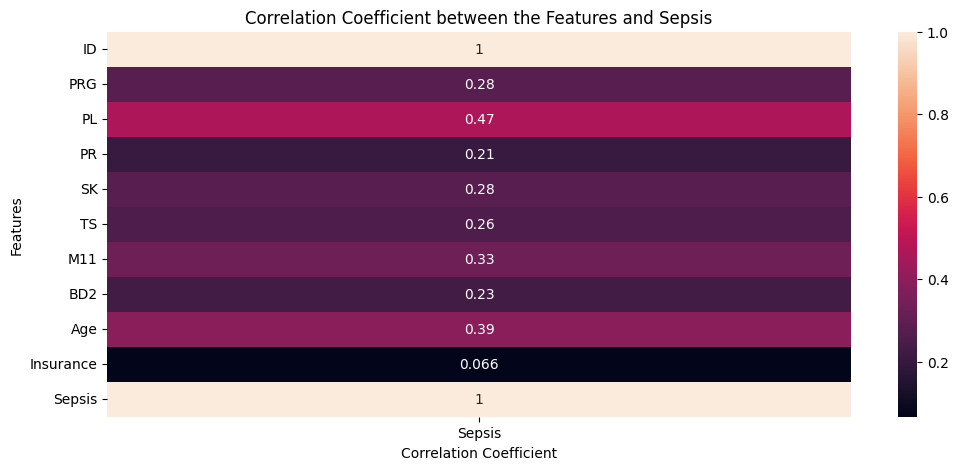

In [23]:
# Set the figure size for the heatmap
plt.figure(figsize=(12, 5))

# Create a heatmap with annotations
sns.heatmap(sepsis_corr.to_frame(), annot=True)

# Set the title for the heatmap
plt.title('Correlation Coefficient between the Features and Sepsis')

# Set the labels for the y-axis and x-axis
plt.ylabel('Features')
plt.xlabel('Correlation Coefficient')

# Show the heatmap
plt.show()

# DATA PREPARATION

The Insurance feature is dropped based on the conclusion from the hypothesis conducted and also the correlation coefficient in relation to Sepsis (Very week positive correlation of 0.066)

In [35]:
# Split the data into features (X) and the target variable (y)
X = clean_train.drop(['ID','Insurance','Sepsis'], axis=1).copy()
y = clean_train['Sepsis']

In [36]:
# Define a function to preprocess the data
def preprocess_data(df: pd.DataFrame):
    """
    Preprocess the data by scaling numerical columns.

    Parameters:
        df (DataFrame): data.

    Returns:
        preprocessed_data (array): Preprocessed data.
    """

    # Identify numerical columns
    num_cols = df.select_dtypes('number').columns

    # Create a ColumnTransformer to handle scaling
    preprocessor = ColumnTransformer([
        ('scale', StandardScaler(), num_cols),
    ], remainder='passthrough')
    
    # Preprocess (fit) the data
    preprocessor.fit(df)

    # Preprocess (transform) the data
    preprocessed_data = preprocessor.transform(df)

    # Get the transformer
    scaler = preprocessor.named_transformers_['scale']

    # Access the feature names using the get_feature_names_out() method
    scaled_feature_names = scaler.get_feature_names_out(input_features=num_cols)

    # Form a list of the features
    feature_names = list(scaled_feature_names)

    return preprocessed_data, feature_names, preprocessor


In [37]:
# Preprocess the training data and retrieve the feature names
X_preprocessed, feature_names, _,= preprocess_data(X)

In [38]:
# Confirm changes
pd.DataFrame(X_preprocessed, columns=feature_names)

,PRG,PL,PR,SK,TS,M11,BD2,Age
0,0.647402,0.852744,0.169109,0.902098,-0.682191,0.209955,0.432333,1.413836
1,-0.840679,-1.076512,-0.141457,0.527197,-0.682191,-0.664876,-0.386002,-0.193804
2,1.242635,1.924553,-0.244979,-1.284822,-0.682191,-1.077297,0.565757,-0.109191
3,-0.840679,-0.954020,-0.141457,0.152297,0.124823,-0.477412,-0.931558,-1.039930
4,-1.138295,0.515890,-1.487246,0.902098,0.760132,1.397227,5.357163,-0.024579
...,...,...,...,...,...,...,...,...
594,0.647402,0.087166,0.169109,1.526932,1.292417,0.209955,0.746620,0.060034
595,-1.138295,2.077668,0.686720,-0.410054,0.906081,0.009994,0.595406,-0.955317
596,-1.138295,-1.627728,0.376154,-1.284822,-0.682191,1.672174,-0.851503,1.075385
597,-0.840679,-0.954020,-2.315423,-0.097637,-0.467559,-0.514905,0.230714,-1.039930


### HANDLE CLASS IMBALANCE - THE SMOTE METHOD
In the context of the project, I encountered a class imbalance issue within the target variable, "Sepsis". This means that the number of instances belonging to each class (Positive or Negative) was not balanced, potentially leading to skewed model performance.

To tackle this challenge, I used the Synthetic Minority Over-sampling Technique (SMOTE). This ingenious technique generates synthetic samples for the minority class, in my case, the Sepsis, with the goal of achieving a more balanced class distribution. The strategy behind SMOTE is to alleviate the class imbalance problem by creating synthetic instances that lie between existing instances of the minority class.

In [39]:
# Apply SMOTE to the entire dataset
smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=12)
X_resampled, y_resampled = smote.fit_resample(X_preprocessed, y)

In [40]:
# Confirm changes after using SMOTE to handle class imbalance
pd.DataFrame(X_resampled).shape, pd.DataFrame(y_resampled).shape

((782, 8), (782, 1))

In [41]:
# Class distribution of y after resampling 
pd.value_counts(pd.Series(y_resampled))

Sepsis
1    391
0    391
Name: count, dtype: int64

Before applying SMOTE, our class distribution indicated a significant disparity:

- Negative (Class 0): 391 instances
- Positive (Class 1): 208 instances

By applying SMOTE with parameters "sampling_strategy='auto', k_neighbors=5, random_state=12," I effectively increased the number of instances in the minority class. The result was a balanced class distribution:

- Negative (Class 0): 391 instances
- Positive (Class 1): 391 instances

This rebalanced distribution sets the stage for more accurate and reliable model training and evaluation. By addressing the class imbalance using SMOTE, I ensure that the predictive models are not biased toward the majority class and can accurately capture patterns and insights from both classes.

### TRAIN - VAL SPLIT

In [42]:
# Split the data into training and validation sets with a test size of 20% and random state of 12
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=12, stratify=y_resampled)

# Print the shapes of the training and validation sets to check the split
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(625, 8) (157, 8) (625,) (157,)


In [44]:
# Save the training and the validation set for reproducibility
pd.DataFrame(X_train, columns=feature_names).to_csv('../data/processed/x_train.csv', index=False)

pd.DataFrame(X_val, columns=feature_names).to_csv('../data/processed/x_validation.csv', index=False)

I executed the crucial step of splitting our data into training and validation sets using the `train_test_split` function.  In the `test_size`, I allocated 20% of the data to the validation set. 

The `stratify` parameter helps maintain the balanced class distribution in both the training and testing sets. Since we've previously balanced the classes using SMOTE, it's important to preserve this balance during the data split. 

This ensured that the model's training phase was conducted on one subset, while its performance assessment was carried out on an unseen subset. By integrating SMOTE and data splitting, I not only alleviated class imbalance concerns but also ensured a robust evaluation of the model's generalization capabilities.

# MODELING

### MODEL SELECTION

1 consider five (5) models for Sepsis prediction:

1. Ada Boost Classifier
2. SDG Classifier
3. Random Forest Classifier
4. XGB Classifier
5. Gradient Boosting Classifier

We evaluate each model's performance using cross-validation to ensure reliable metrics. The key evaluation metric used is accuracy.

In [45]:
models = [
    ('Ada Boost Classifier', AdaBoostClassifier(random_state=12)),
    ('SDG Classifier', SGDClassifier(random_state=12)),
    ('Random Forest Classifier', RandomForestClassifier(random_state=12)),
    ('XGB Classifier', XGBClassifier()),
    ('Gradient Boosting Classifier', GradientBoostingClassifier(random_state=12)),
]

# Create an empty dictionary to store the results
results = {
    'Model': [],
    'Accuracy': []
}

# Loop through each model and calculate performance metrics using cross-validation
for model_name, model in models:
    
    # Define the scoring metrics to calculate
    scoring = ['accuracy']

    # Perform cross-validation and get the results
    cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)

    # Store the average scores for each metric in the results dictionary
    results['Model'].append(model_name)
    results['Accuracy'].append(cv_results['test_accuracy'].mean())

In [46]:
# covert the results map to a DataFrame, Sort Values by Accuracy
results = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)

# Confirm changes
results

,Model,Accuracy
2,Random Forest Classifier,0.8000
3,XGB Classifier,0.7840
4,Gradient Boosting Classifier,0.7696
0,Ada Boost Classifier,0.7360
1,SDG Classifier,0.6896


### MODEL PERFORMANCE VISUALIZATION

To visually compare model performances, I create a bar plot using Plotly Express. The bar plot displays the accuracy metric for each model, providing an easy-to-understand representation of their relative performances.


In [47]:
# Plot the bar graph
fig = px.bar(results, x='Model', y='Accuracy',
             title='Model Performance Metrics',
             labels={'Model': 'Model Name', 'Accuracy': 'Mean Accuracy Score (5 Folds)'}
            )

# Show the plot
fig.show()

The `Random Forest Classifier` stands out as the best-performing model due to its highest accuracy among the evaluated models `(80.37%)`. As accuracy is a key performance metric for the project, selecting the Random Forest Classifier ensures that I prioritize correctly predicting Sepsis (either Positive or Negative ) in the future predictions on the test dataset.

This combination of high accuracy, and interpretability makes the Random Forest Classifier an ideal choice for addressing the project's goals of identifying predicting Sepsis in patients.

# MODEL EVALUATION

A comprehensive evaluation of the Random Forest Classifier will be conducted using the validation set to identify its optimal performance. 

The evaluation primarily focused on analyzing the models' performance through the lens of the confusion matrix. This matrix provides a detailed breakdown of the model's predictions, allowing us to make informed decisions about its effectiveness.

In [56]:
# Create a function to generate the classification report and also plot the confusion matrix

def get_model_performance(y_val, y_pred):
    """
    Generate a classification report and plot a confusion matrix using Plotly Express.

    Parameters:
    y_val (array-like): The true labels.
    y_pred (array-like): The predicted labels.
   
    Returns:
    None
        The function prints the classification report and displays the confusion matrix plot.
    """

    # Define a custom color scale
    custom_color_scale = [[0.0, "#835AF1"],
                        [0.5, "#37AA9C"],
                        [1.0, "#B8F7D4"]] 

    # Define class labels
    class_labels = ['Negative', 'Positive']

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_val, y_pred)
    
    
    # Create classification report
    report = classification_report(y_val, y_pred, target_names=class_labels)

    # Print report
    print(report)

    # Create a DataFrame for the confusion matrix
    conf_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

    # Create a heatmap with annotations
    fig = px.imshow(conf_df,
                    labels=dict(x='Predicted', y='Actual'),
                    x=class_labels,
                    y=class_labels,
                    color_continuous_scale=custom_color_scale)

    # Add annotations to display the values within the cells
    for i in range(len(class_labels)):
        for j in range(len(class_labels)):
            fig.add_annotation(x=class_labels[j], y=class_labels[i],
                            text=str(conf_matrix[i, j]),
                            showarrow=False, font=dict(size=16, color='white'))

    # Customize the layout
    fig.update_layout(title='Confusion Matrix',
                    xaxis_title='Predicted',
                    yaxis_title='Actual')

    # Show the plot
    fig.show()

In [78]:
# Create a RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=12)

# Fit the RandomForestClassifier model on the training data
rf_model.fit(X_train, y_train)

# Predict the labels on the validation data using the trained model
rf_y_pred = rf_model.predict(X_val)

# Evaluate the model performance using the get_model_performance function and display results
get_model_performance(y_val, rf_y_pred)

              precision    recall  f1-score   support

    Negative       0.84      0.83      0.84        78
    Positive       0.84      0.85      0.84        79

    accuracy                           0.84       157
   macro avg       0.84      0.84      0.84       157
weighted avg       0.84      0.84      0.84       157



- **Precision for Positive class (Se psis):** 0.84 means that among the predicted positive cases, 84% are correctly identified as patients who will develop sepsis.
- **Recall for Positive class (Sepsis):** 0.90 means that the model identifies 90% of the actual patients who will develop sepsis.
- **F1-score for Positive class (Sepsis):** 0.87 is the harmonic mean of precision and recall for the class, providing a balance between precision and recall.

- **Precision Negative class (No Sepsis):** 0.89 signifies that among the predicted negative cases, 89% are accurately identified as patients who will not develop sepsis.
- **Recall Negative class (No Sepsis):** 0.82 implies that the model captures 82% of the actual patients who will not develop sepsis.
- **F1-score Negative class (No Sepsis):** 0.85 is the harmonic mean of precision and recall for the 'No Sepsis' class.

**False Positives (FP):** These are cases where the model predicted 'Positive' (developing sepsis), but the actual label was 'Negative' (no sepsis). It represents 100% - Precision(Positive), so FP rate is 0.16 or 16%.

**False Negatives (FN):** These are cases where the model predicted 'Negative' (no sepsis), but the actual label was 'Positive' (developing sepsis). It represents 100% - Recall(Positive), so FN rate is 0.10 or 10%.

The model's false positive rate is 16%, meaning that 16% of cases predicted as 'Positive' were actually 'Negative' (no sepsis). The false negative rate is 10%, indicating that 10% of actual 'Positive' cases were incorrectly predicted as 'Negative' (no sepsis).

# MODEL IMPROVEMENT

Here, hyperparameter tuning will be performed using Optuna on the Random Forest Classifier model.

### USING OPTUNA

Optuna is an open-source Python library for hyperparameter optimization. Developed by the Japanese company Preferred Networks, Optuna provides an elegant and automated way to search for the best hyperparameters by optimizing an objective function. It is designed to be user-friendly and highly adaptable to different machine learning frameworks.

Optuna operates based on a three-step process:

1. **Define the Search Space:** Users specify the range and type of hyperparameters to optimize, such as integer, float, or categorical values. This step defines the search space that Optuna will explore.

2. **Define the Objective Function:** The objective function is the core of the optimization process. It evaluates the performance of the model for a given set of hyperparameters. Optuna aims to minimize or maximize this function, depending on the optimization goal.

3. **Optimization:** Optuna uses Bayesian optimization to sample different hyperparameter configurations. It iteratively evaluates these configurations and updates the probabilistic model, narrowing down the search space. The process continues until a satisfactory set of hyperparameters is found.

In [48]:
# Define the objective function
def objective(trial):
    # Suggest values for hyperparameters
    n_estimators = trial.suggest_int("n_estimators", 10, 200)
    max_depth = trial.suggest_int("max_depth", 2, 32)

    # Define Model
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=12)

    # Perform Cross Validation
    score = cross_val_score(model, X_train, y_train, n_jobs=-1, cv=10)

    # Calculate Accuracy
    accuracy = score.mean()

    return accuracy

In [49]:
# Create study object
study = optuna.create_study(direction="maximize")

# Run optimization process
study.optimize(objective, n_trials=20, show_progress_bar=True)

[I 2023-11-26 20:13:25,222] A new study created in memory with name: no-name-2c42b3aa-eb75-4fd5-b788-084b1a0ea43a
Best trial: 0. Best value: 0.804916:   5%|▌         | 1/20 [00:20<06:23, 20.20s/it]

[I 2023-11-26 20:13:45,480] Trial 0 finished with value: 0.8049155145929341 and parameters: {'n_estimators': 172, 'max_depth': 30}. Best is trial 0 with value: 0.8049155145929341.


Best trial: 0. Best value: 0.804916:  10%|█         | 2/20 [00:28<03:53, 12.99s/it]

[I 2023-11-26 20:13:53,429] Trial 1 finished with value: 0.8033026113671274 and parameters: {'n_estimators': 86, 'max_depth': 14}. Best is trial 0 with value: 0.8049155145929341.


Best trial: 0. Best value: 0.804916:  15%|█▌        | 3/20 [00:32<02:34,  9.08s/it]

[I 2023-11-26 20:13:57,839] Trial 2 finished with value: 0.793753200204813 and parameters: {'n_estimators': 67, 'max_depth': 29}. Best is trial 0 with value: 0.8049155145929341.


Best trial: 0. Best value: 0.804916:  20%|██        | 4/20 [00:36<01:52,  7.03s/it]

[I 2023-11-26 20:14:01,765] Trial 3 finished with value: 0.7936763952892985 and parameters: {'n_estimators': 53, 'max_depth': 23}. Best is trial 0 with value: 0.8049155145929341.


Best trial: 0. Best value: 0.804916:  25%|██▌       | 5/20 [00:47<02:08,  8.60s/it]

[I 2023-11-26 20:14:13,130] Trial 4 finished with value: 0.7952892985151049 and parameters: {'n_estimators': 166, 'max_depth': 7}. Best is trial 0 with value: 0.8049155145929341.


Best trial: 0. Best value: 0.804916:  30%|███       | 6/20 [00:49<01:25,  6.08s/it]

[I 2023-11-26 20:14:14,312] Trial 5 finished with value: 0.7312339989759344 and parameters: {'n_estimators': 20, 'max_depth': 2}. Best is trial 0 with value: 0.8049155145929341.


Best trial: 0. Best value: 0.804916:  35%|███▌      | 7/20 [00:58<01:32,  7.14s/it]

[I 2023-11-26 20:14:23,644] Trial 6 finished with value: 0.801689708141321 and parameters: {'n_estimators': 101, 'max_depth': 15}. Best is trial 0 with value: 0.8049155145929341.


Best trial: 7. Best value: 0.811316:  40%|████      | 8/20 [01:07<01:31,  7.66s/it]

[I 2023-11-26 20:14:32,441] Trial 7 finished with value: 0.81131592421915 and parameters: {'n_estimators': 191, 'max_depth': 24}. Best is trial 7 with value: 0.81131592421915.


Best trial: 7. Best value: 0.811316:  45%|████▌     | 9/20 [01:15<01:25,  7.74s/it]

[I 2023-11-26 20:14:40,322] Trial 8 finished with value: 0.8097798259088582 and parameters: {'n_estimators': 180, 'max_depth': 10}. Best is trial 7 with value: 0.81131592421915.


Best trial: 7. Best value: 0.811316:  50%|█████     | 10/20 [01:20<01:09,  6.99s/it]

[I 2023-11-26 20:14:45,643] Trial 9 finished with value: 0.8049411162314387 and parameters: {'n_estimators': 110, 'max_depth': 32}. Best is trial 7 with value: 0.81131592421915.


Best trial: 7. Best value: 0.811316:  55%|█████▌    | 11/20 [01:25<00:58,  6.54s/it]

[I 2023-11-26 20:14:51,182] Trial 10 finished with value: 0.8032770097286226 and parameters: {'n_estimators': 133, 'max_depth': 22}. Best is trial 7 with value: 0.81131592421915.


Best trial: 7. Best value: 0.811316:  60%|██████    | 12/20 [01:32<00:53,  6.70s/it]

[I 2023-11-26 20:14:58,236] Trial 11 finished with value: 0.7953661034306195 and parameters: {'n_estimators': 198, 'max_depth': 8}. Best is trial 7 with value: 0.81131592421915.


Best trial: 12. Best value: 0.814567:  65%|██████▌   | 13/20 [01:40<00:48,  6.99s/it]

[I 2023-11-26 20:15:05,879] Trial 12 finished with value: 0.8145673323092678 and parameters: {'n_estimators': 194, 'max_depth': 21}. Best is trial 12 with value: 0.8145673323092678.


Best trial: 12. Best value: 0.814567:  70%|███████   | 14/20 [01:46<00:39,  6.52s/it]

[I 2023-11-26 20:15:11,280] Trial 13 finished with value: 0.8001024065540194 and parameters: {'n_estimators': 143, 'max_depth': 23}. Best is trial 12 with value: 0.8145673323092678.


Best trial: 14. Best value: 0.81618:  75%|███████▌  | 15/20 [01:55<00:37,  7.53s/it] 

[I 2023-11-26 20:15:21,218] Trial 14 finished with value: 0.8161802355350742 and parameters: {'n_estimators': 199, 'max_depth': 19}. Best is trial 14 with value: 0.8161802355350742.


Best trial: 14. Best value: 0.81618:  80%|████████  | 16/20 [02:01<00:28,  7.09s/it]

[I 2023-11-26 20:15:27,263] Trial 15 finished with value: 0.8065028161802357 and parameters: {'n_estimators': 151, 'max_depth': 18}. Best is trial 14 with value: 0.8161802355350742.


Best trial: 14. Best value: 0.81618:  85%|████████▌ | 17/20 [02:07<00:19,  6.52s/it]

[I 2023-11-26 20:15:32,454] Trial 16 finished with value: 0.801689708141321 and parameters: {'n_estimators': 126, 'max_depth': 19}. Best is trial 14 with value: 0.8161802355350742.


Best trial: 14. Best value: 0.81618:  90%|█████████ | 18/20 [02:13<00:12,  6.33s/it]

[I 2023-11-26 20:15:38,359] Trial 17 finished with value: 0.8097030209933436 and parameters: {'n_estimators': 158, 'max_depth': 26}. Best is trial 14 with value: 0.8161802355350742.


Best trial: 14. Best value: 0.81618:  95%|█████████▌| 19/20 [02:20<00:06,  6.74s/it]

[I 2023-11-26 20:15:46,040] Trial 18 finished with value: 0.8097286226318484 and parameters: {'n_estimators': 194, 'max_depth': 12}. Best is trial 14 with value: 0.8161802355350742.


Best trial: 14. Best value: 0.81618: 100%|██████████| 20/20 [02:28<00:00,  7.41s/it]

[I 2023-11-26 20:15:53,470] Trial 19 finished with value: 0.8129544290834614 and parameters: {'n_estimators': 200, 'max_depth': 20}. Best is trial 14 with value: 0.8161802355350742.


In [50]:
# Continue the optimization process for another 20 trials
study.optimize(objective, n_trials=20, show_progress_bar=True)

Best trial: 14. Best value: 0.81618:   5%|▌         | 1/20 [00:00<00:11,  1.58it/s]

[I 2023-11-26 20:16:01,047] Trial 20 finished with value: 0.7681259600614438 and parameters: {'n_estimators': 10, 'max_depth': 16}. Best is trial 14 with value: 0.8161802355350742.


Best trial: 14. Best value: 0.81618:  10%|█         | 2/20 [00:08<01:23,  4.63s/it]

[I 2023-11-26 20:16:08,480] Trial 21 finished with value: 0.8113415258576548 and parameters: {'n_estimators': 180, 'max_depth': 20}. Best is trial 14 with value: 0.8161802355350742.


Best trial: 14. Best value: 0.81618:  15%|█▌        | 3/20 [00:15<01:37,  5.72s/it]

[I 2023-11-26 20:16:15,511] Trial 22 finished with value: 0.8129544290834614 and parameters: {'n_estimators': 198, 'max_depth': 26}. Best is trial 14 with value: 0.8161802355350742.


Best trial: 14. Best value: 0.81618:  20%|██        | 4/20 [00:21<01:35,  5.99s/it]

[I 2023-11-26 20:16:21,902] Trial 23 finished with value: 0.808115719406042 and parameters: {'n_estimators': 177, 'max_depth': 20}. Best is trial 14 with value: 0.8161802355350742.


Best trial: 14. Best value: 0.81618:  25%|██▌       | 5/20 [00:28<01:35,  6.34s/it]

[I 2023-11-26 20:16:28,858] Trial 24 finished with value: 0.8096774193548388 and parameters: {'n_estimators': 162, 'max_depth': 17}. Best is trial 14 with value: 0.8161802355350742.


Best trial: 14. Best value: 0.81618:  30%|███       | 6/20 [00:36<01:37,  6.94s/it]

[I 2023-11-26 20:16:36,974] Trial 25 finished with value: 0.8129544290834614 and parameters: {'n_estimators': 200, 'max_depth': 27}. Best is trial 14 with value: 0.8161802355350742.


Best trial: 14. Best value: 0.81618:  35%|███▌      | 7/20 [00:43<01:30,  6.96s/it]

[I 2023-11-26 20:16:43,951] Trial 26 finished with value: 0.8113415258576548 and parameters: {'n_estimators': 180, 'max_depth': 21}. Best is trial 14 with value: 0.8161802355350742.


Best trial: 14. Best value: 0.81618:  40%|████      | 8/20 [00:48<01:17,  6.42s/it]

[I 2023-11-26 20:16:49,238] Trial 27 finished with value: 0.8065796210957501 and parameters: {'n_estimators': 141, 'max_depth': 13}. Best is trial 14 with value: 0.8161802355350742.


Best trial: 14. Best value: 0.81618:  45%|████▌     | 9/20 [00:54<01:07,  6.10s/it]

[I 2023-11-26 20:16:54,632] Trial 28 finished with value: 0.8017409114183307 and parameters: {'n_estimators': 121, 'max_depth': 18}. Best is trial 14 with value: 0.8161802355350742.


Best trial: 14. Best value: 0.81618:  50%|█████     | 10/20 [01:01<01:04,  6.43s/it]

[I 2023-11-26 20:17:01,801] Trial 29 finished with value: 0.8128776241679467 and parameters: {'n_estimators': 169, 'max_depth': 24}. Best is trial 14 with value: 0.8161802355350742.


Best trial: 14. Best value: 0.81618:  55%|█████▌    | 11/20 [01:08<01:00,  6.77s/it]

[I 2023-11-26 20:17:09,328] Trial 30 finished with value: 0.8161290322580644 and parameters: {'n_estimators': 186, 'max_depth': 29}. Best is trial 14 with value: 0.8161802355350742.


Best trial: 14. Best value: 0.81618:  60%|██████    | 12/20 [01:16<00:55,  6.88s/it]

[I 2023-11-26 20:17:16,473] Trial 31 finished with value: 0.8129032258064516 and parameters: {'n_estimators': 187, 'max_depth': 30}. Best is trial 14 with value: 0.8161802355350742.


Best trial: 14. Best value: 0.81618:  65%|██████▌   | 13/20 [01:22<00:46,  6.71s/it]

[I 2023-11-26 20:17:22,795] Trial 32 finished with value: 0.8112903225806452 and parameters: {'n_estimators': 170, 'max_depth': 28}. Best is trial 14 with value: 0.8161802355350742.


Best trial: 14. Best value: 0.81618:  70%|███████   | 14/20 [01:29<00:40,  6.81s/it]

[I 2023-11-26 20:17:29,833] Trial 33 finished with value: 0.8161290322580644 and parameters: {'n_estimators': 186, 'max_depth': 32}. Best is trial 14 with value: 0.8161802355350742.


Best trial: 14. Best value: 0.81618:  75%|███████▌  | 15/20 [01:35<00:32,  6.59s/it]

[I 2023-11-26 20:17:35,899] Trial 34 finished with value: 0.81131592421915 and parameters: {'n_estimators': 150, 'max_depth': 32}. Best is trial 14 with value: 0.8161802355350742.


Best trial: 14. Best value: 0.81618:  80%|████████  | 16/20 [01:38<00:22,  5.60s/it]

[I 2023-11-26 20:17:39,198] Trial 35 finished with value: 0.8081157194060419 and parameters: {'n_estimators': 80, 'max_depth': 30}. Best is trial 14 with value: 0.8161802355350742.


Best trial: 14. Best value: 0.81618:  85%|████████▌ | 17/20 [01:42<00:15,  5.15s/it]

[I 2023-11-26 20:17:43,283] Trial 36 finished with value: 0.796953405017921 and parameters: {'n_estimators': 50, 'max_depth': 29}. Best is trial 14 with value: 0.8161802355350742.


Best trial: 14. Best value: 0.81618:  90%|█████████ | 18/20 [01:52<00:12,  6.35s/it]

[I 2023-11-26 20:17:52,432] Trial 37 finished with value: 0.8129288274449564 and parameters: {'n_estimators': 183, 'max_depth': 32}. Best is trial 14 with value: 0.8161802355350742.


Best trial: 14. Best value: 0.81618:  95%|█████████▌| 19/20 [02:00<00:06,  6.92s/it]

[I 2023-11-26 20:18:00,696] Trial 38 finished with value: 0.8097030209933436 and parameters: {'n_estimators': 158, 'max_depth': 26}. Best is trial 14 with value: 0.8161802355350742.


Best trial: 14. Best value: 0.81618: 100%|██████████| 20/20 [02:07<00:00,  6.37s/it]

[I 2023-11-26 20:18:07,799] Trial 39 finished with value: 0.8065028161802357 and parameters: {'n_estimators': 171, 'max_depth': 24}. Best is trial 14 with value: 0.8161802355350742.


After the optimization process is finished, we can see the best trial and the best hyperparameters that Optuna found.

In [51]:
# Print best trial and best hyperparameters
print("Best trial:", study.best_trial)
print("Best hyperparameters:", study.best_params)

Best trial: FrozenTrial(number=14, state=1, values=[0.8161802355350742], datetime_start=datetime.datetime(2023, 11, 26, 20, 15, 11, 354428), datetime_complete=datetime.datetime(2023, 11, 26, 20, 15, 21, 218154), params={'n_estimators': 199, 'max_depth': 19}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=200, log=False, low=10, step=1), 'max_depth': IntDistribution(high=32, log=False, low=2, step=1)}, trial_id=14, value=None)
Best hyperparameters: {'n_estimators': 199, 'max_depth': 19}


### HYPERPARAMETER PROCESS VISUALIZATION

We can also visualize the optimization process using Optuna's built-in visualization functions. These functions use Plotly to create interactive plots that show various aspects of the optimization process

In [52]:
# Plot optimization history
ov.plot_optimization_history(study)

The optimization history plot shows how the Accuracy changes over the number of trials. It also shows the best value so far and the percentile range of the values. It can be seen that the Accuracy increases and decreases in the first few trials, then stabilizes around 0.81618, and reaches the highest value of 0.81618 at trial 14.

In [53]:
# Plot parameter importance
ov.plot_param_importances(study)

The parameter importance plot shows how much each hyperparameter contributes to the Accuracy that was achieved. It uses a permutation-based method to calculate the importance scores. From the plot, it is observed that max_dept is the most important parameter, followed by n_estimators. This means that changing the number of trees in the random forest has the most impact on the model performance, while changing the minimum number of samples required to be at a leaf node has the least impact.

In [54]:
# Plot parallel_coordinate
ov.plot_parallel_coordinate(study)

The parallel coordinate plot shows how each hyperparameter affects the Accuracy levels across all trials. It also shows the color gradient that indicates the Accuracy level. From the plot, higher values of n_estimators and max_depth is associated with lower Accuracy but higher values of n_estimators and lower values of max_depth is associated with higher Accuracy. Moreover, the plot shows how different combinations of hyperparameters result in different levels of Accuracy.

In [57]:
# Define RandomForestClassifier with the hyperparameters identified
best_rf_model = RandomForestClassifier(n_estimators=list(study.best_params.values())[0], max_depth=list(study.best_params.values())[1], random_state=12)

# Fit the best RandomForestClassifier model on the training data
best_rf_model.fit(X_train, y_train)

# Predict the labels on the validation data using the trained model
best_rf_model_y_pred = best_rf_model.predict(X_val)

# Evaluate the best model on the validation set
best_accuracy = best_rf_model.score(X_val, y_val)
print('The accuracy of the Model is: ', best_accuracy)

# Evaluate the model performance using the get_model_performance function and display results
get_model_performance(y_val, best_rf_model_y_pred)

The accuracy of the Model is:  0.8662420382165605
              precision    recall  f1-score   support

    Negative       0.88      0.85      0.86        78
    Positive       0.85      0.89      0.87        79

    accuracy                           0.87       157
   macro avg       0.87      0.87      0.87       157
weighted avg       0.87      0.87      0.87       157



Upon conducting hyperparameter tuning, the slight adjustment in the confusion matrix demonstrates the refined predictive capability of the model, with improved accuracy in correctly classifying instances of patients in ICU developing Sepsis (Positive) or not (Negative).

# FUTURE PREDICTIONS

### PREPROCESS TEST SET

In [58]:
# Store the PatientID column before dropping it from the test data
patientID = test['ID']

# Drop the PatientID and Insurance columns from the test data
test.drop(['ID', 'Insurance'], axis=1, inplace=True)

# Preprocess the test data using the preprocessor function
X_test_preprocessed, X_test_feature_names, test_preprocessor = preprocess_data(test)

### PERFORM PREDICTIONS

In [59]:
# Predict the labels on the preprocessed test data using the trained model
test_y_pred = best_rf_model.predict(X_test_preprocessed)

# Create a DataFrame to store the predicted results
predicted_result = pd.DataFrame({'ID': patientID, 'Sepsis': np.where(test_y_pred == 1, 'Positive', 'Negative')})

# Display the count of predicted patients who are likely to develop sepsis or not
sepsis_counts = predicted_result['Sepsis'].value_counts()
print(sepsis_counts)

Sepsis
Negative    108
Positive     61
Name: count, dtype: int64


The result post-future prediction on the test set showcases the predicted Sepsis outcomes among the test sample. Among the evaluated cases, the prediction yielded 108 instances categorized as 'Negative' for Sepsis and 61 instances classified as 'Positive.' 

This breakdown presents the model's predictive performance concerning the presence or absence of Sepsis within the test data. 

# CONCLUSION


Throughout this project, five distinct models were trained and evaluated to predict Sepsis within the ICU setting. Following rigorous analysis and evaluation, the Random Forest Classifier emerged as the best-performing model, boasting an accuracy of approximately 86.62%. This robust accuracy signifies the model's commendable ability to discern and classify Sepsis cases accurately. 

The comprehensive exploration of various machine learning algorithms underscores the efficacy of the Random Forest Classifier in predicting Sepsis onset, demonstrating promising potential for aiding healthcare professionals in timely intervention and critical care decision-making within ICU environments. 

However, while this model displays commendable performance, ongoing refinement and validation are crucial to ensure its reliability in real-world clinical settings, thereby offering a proactive shield against the complex and life-threatening condition of Sepsis.

# EXPORTATIONS

The best Random Forest Classifier Model and the preprocessor will be exported

In [62]:
# Define the paths for saving the preprocessor and model
model_dir = '../data/models'
preprocessor_path = os.path.join(model_dir, 'preprocessor.joblib')
model_path = os.path.join(model_dir, 'rf_model.joblib')

In [63]:
# Create the '/models' directory if it doesn't exist
os.makedirs(model_dir, exist_ok=True)

In [64]:
# Save the preprocessor to a file
joblib.dump(test_preprocessor, preprocessor_path)


# Save the best_rf_model to a file
joblib.dump(best_rf_model, model_path)

['../data/models\\rf_model.joblib']

In [65]:
# Print a message to confirm the save
print(f"preprocessor saved to {preprocessor_path}")
print(f"best_rf_model saved to {model_path}")


preprocessor saved to ../data/models\preprocessor.joblib
best_rf_model saved to ../data/models\rf_model.joblib
